In [1]:
import numpy as np
import pandas as pd

from my_framework.modeles.SIRModel import SIRModel
from my_framework.modeles.SEIRModel import SEIRModel
from my_framework.modeles.SEIRDModel import SEIRDModel
from my_framework.etl import get_dataset
from my_framework.plot import plot_simple_sir, plot_triple_sir, plotseird

# SIR

In [2]:
# None

# SEIR

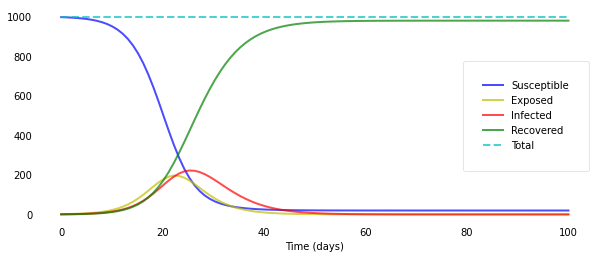

In [3]:
# variable
t = np.linspace(0, 100, 100)
N = 1000
beta = 1.0  
D = 4.0 
gamma = 1.0 / D
delta = 1.0 / 3.0  


seir_model = SEIRModel(beta=beta, gamma=gamma, delta=delta)

S, E, I, R = seir_model.predict(t, N, 1)
plotseird(t, S, E, I, R )

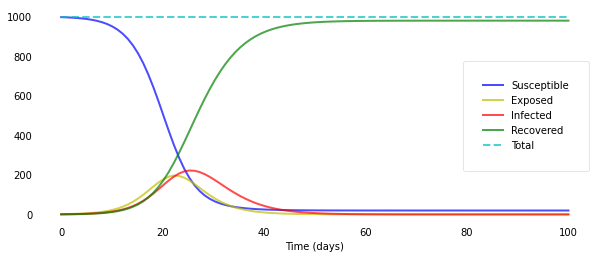

In [4]:
seir_model_predict = SEIRModel()
params, covariance = seir_model_predict.fit(I, N)
S_pred, E_pres, I_pred, R_pred = seir_model_predict.predict(t, N, 1)
plotseird(t, S_pred, E_pres, I_pred, R_pred)

In [5]:
print("True", seir_model.params)
print("Predict", seir_model_predict.params)

True {'beta': 1.0, 'gamma': 0.25, 'delta': 0.3333333333333333}
Predict {'beta': 0.9999999999989415, 'gamma': 0.24999999999997324, 'delta': 0.33333333333393944}


# SEIRD

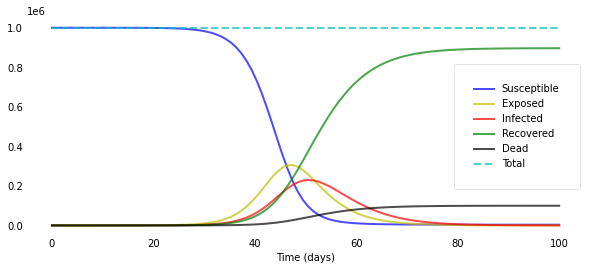

In [6]:
# variable
t = np.linspace(0, 100, 100)
N = 1_000_000
D = 4
gamma = 1 / D
R_0 = 5
all_params = {"gamma": gamma, "delta": 1 / 5, "beta": R_0 * gamma, "alpha": 0.2, "rho": 1/9}

seird_model = SEIRDModel(**all_params)
S, E, I, R, D = seird_model.predict(t, N, 1)
plotseird(t, S, E, I, R, D )

/usr/local/lib/python3.6/dist-packages/scipy/integrate/odepack.py:248: ODEintWarning: Excess work done on this call (perhaps wrong Dfun type). Run with full_output = 1 to get quantitative information.
  warnings.warn(warning_msg, ODEintWarning)


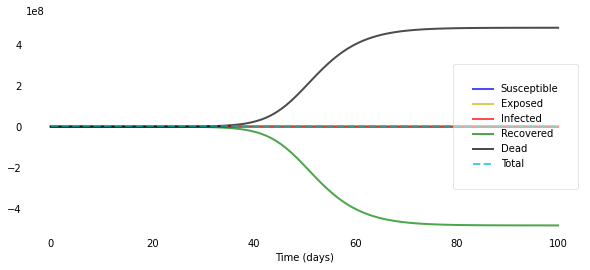

In [10]:
seird_model_predict = SEIRDModel()
seird_model_predict.fit(I, N)
S_pred, E_pred, I_pred, R_pred, D_pred = seird_model_predict.predict(t, N, 1)
plotseird(t, S_pred, E_pred, I_pred, R_pred, D_pred)